Recently [Simon Garnier](http://www.simongarnier.org/) created [several visualisations](http://graphzoo.tumblr.com/day/2015/07/25) from a [football dataset](https://github.com/jalapic/engsoccerdata) compiled by [James Curley](https://jalapic.github.io/) showing statistics on match performances in the English Premier League.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.style.use('ramiro')

df = pd.read_csv('csv/bundesliga.csv', parse_dates=['date'], encoding='latin-1')

chartinfo = 'Author: Ramiro Gómez - ramiro.org • Data: James Curley - github.com/jalapic/engsoccerdata'
infosize = 13

In [2]:
print(df.columns)
df.describe()

Index(['date', 'Season', 'home', 'visitor', 'FT', 'hgoal', 'vgoal', 'tier'], dtype='object')


,Season,hgoal,vgoal,tier
count,15508.000000,15508.000000,15508.000000,15508
mean,1988.215115,1.872517,1.202863,1
std,14.591496,1.459254,1.162654,0
min,1963.000000,0.000000,0.000000,1
25%,1976.000000,1.000000,0.000000,1
50%,1988.000000,2.000000,1.000000,1
75%,2001.000000,3.000000,2.000000,1
max,2013.000000,12.000000,9.000000,1


In [3]:
df.sort('date').tail()

,date,Season,home,visitor,FT,hgoal,vgoal,tier
14584,2014-05-10,2013,Bayer Leverkusen,Werder Bremen,2-1,2,1,1
14583,2014-05-10,2013,Bayern München,VfB Stuttgart,1-0,1,0,1
14582,2014-05-10,2013,VfL Wolfsburg,Bor. Mönchengladbach,3-1,3,1,1
14585,2014-05-10,2013,FC Schalke 04,1. FC Nürnberg,4-1,4,1,1
14589,2014-05-10,2013,FC Augsburg,Eintracht Frankfurt,2-1,2,1,1


In [4]:
def result(row):
    if row.hgoal > row.vgoal:
        return 'Home win'
    elif row.hgoal < row.vgoal:
        return 'Home loss'
    return 'Tie'

df['resulttype'] = df.apply(result, axis=1)

In [5]:
resulttypes_by_season = df.groupby(['Season', 'resulttype']).agg(['count'])['date']

In [6]:
#resulttypes_by_season.plot(kind='bar', stacked=True, figsize=(14, 6))
df_rs = resulttypes_by_season.unstack()
df_rs.head()

count             
resulttype Home loss Home win Tie
Season                           
1963              53      126  61
1964              56      122  62
1965              70      168  68
1966              64      158  84
1967              66      167  73

In [7]:
df_rs = df_rs.apply(lambda x: 100 * x / float(x.sum()), axis=1)
df_rs.head()

count                      
resulttype  Home loss   Home win        Tie
Season                                     
1963        22.083333  52.500000  25.416667
1964        23.333333  50.833333  25.833333
1965        22.875817  54.901961  22.222222
1966        20.915033  51.633987  27.450980
1967        21.568627  54.575163  23.856209

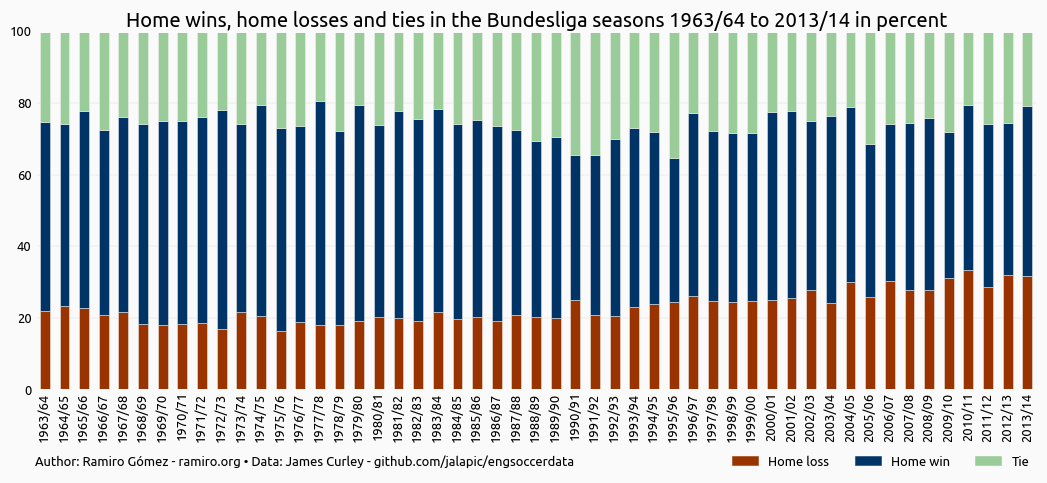

In [8]:
def season_display(year):
    s = str(year)
    return '{0}/{1:02d}'.format(year, int(str(year + 1)[-2:]))

colors = ['#993300', '#003366', '#99cc99']

s1 = df_rs['count']['Home win']
s2 = df_rs['count']['Home loss']
s3 = df_rs['count']['Tie']

xmax = df_rs.index.max()
xmin = df_rs.index.min()

title = 'Home wins, home losses and ties in the Bundesliga seasons {} to {} in percent'.format(
    season_display(xmin), season_display(xmax))

ax = df_rs.plot(kind='bar', stacked=True, figsize=(16, 6), color=colors, title=title, fontsize=13)
ax.set_ylim([0, 100])
ax.set_xlabel('', visible=False)
ax.xaxis.set_major_formatter(
    mpl.ticker.FuncFormatter(lambda val, p: season_display(df_rs.index[val])))

p1 = mpatches.Patch(color=colors[0], label='Home loss')
p2 = mpatches.Patch(color=colors[1], label='Home win')
p3 = mpatches.Patch(color=colors[2], label='Tie')

ax.legend(loc=(.69, -.23), handles=[p1, p2, p3], ncol=3, fontsize=13)
ax.annotate(chartinfo, xy=(0, -1.21), xycoords='axes fraction', fontsize=infosize)
plt.savefig('img/wins-losses-ties-percent-bundesliga-{}-{}.png'.format(xmin, xmax), bbox_inches='tight')

Home goals vs away goals scatterplot aggreagated for each match day. Compare before and after 3 point rule.

In [23]:
df_2points = df[df.Season < 1995]
df_3points = df[df.Season >= 1995]

In [25]:
def goals_matrix(df):
    goals = df.groupby(['vgoal', 'hgoal']).agg('count')['date']
    return goals.unstack().fillna(0)

goals_2points = goals_matrix(df_2points)
goals_2points

hgoal,0,1,2,3,4,5,6,7,8,9,10,11,12
vgoal,,,,,,,,,,,,,
0,618,734,753,522,278,109,53,21,3,3,2,1,1
1,363,1120,822,623,294,149,53,18,3,2,0,2,0
2,264,396,599,318,207,90,31,14,4,2,0,0,0
3,140,246,163,153,60,26,7,5,1,1,0,0,0
4,68,96,70,37,20,2,1,2,1,0,0,0,0
5,20,26,17,7,1,2,2,0,0,0,0,0,0
6,9,8,7,4,3,1,0,0,0,0,0,0,0
7,4,6,1,2,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0


In [26]:
goals_3points = goals_matrix(df_3points)
goals_3points

hgoal,0,1,2,3,4,5,6,7,8,9
vgoal,,,,,,,,,,
0,391,481,450,306,122,44,13,4,0,0
1,346,684,505,281,154,38,18,2,1,0
2,281,338,332,144,77,29,11,0,0,1
3,115,181,120,69,18,13,4,0,0,0
4,44,63,45,11,9,2,0,1,0,0
5,8,18,12,3,2,0,0,0,0,0
6,6,6,4,2,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0
8,0,1,1,0,0,0,0,0,0,0


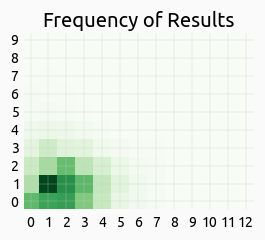

In [27]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(goals_2points, cmap=plt.cm.Greens, interpolation='none')
ax.set_title('Frequency of Results')

plt.yticks(range(len(goals)))
plt.xticks(range(len(goals.columns)))

plt.gca().invert_yaxis()
plt.show()

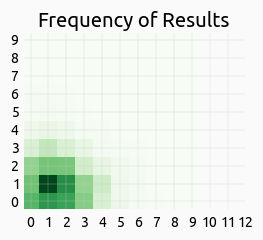

In [28]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(goals_3points, cmap=plt.cm.Greens, interpolation='none')
ax.set_title('Frequency of Results')

plt.yticks(range(len(goals)))
plt.xticks(range(len(goals.columns)))

plt.gca().invert_yaxis()
plt.show()

Most common results splitted by point rules.

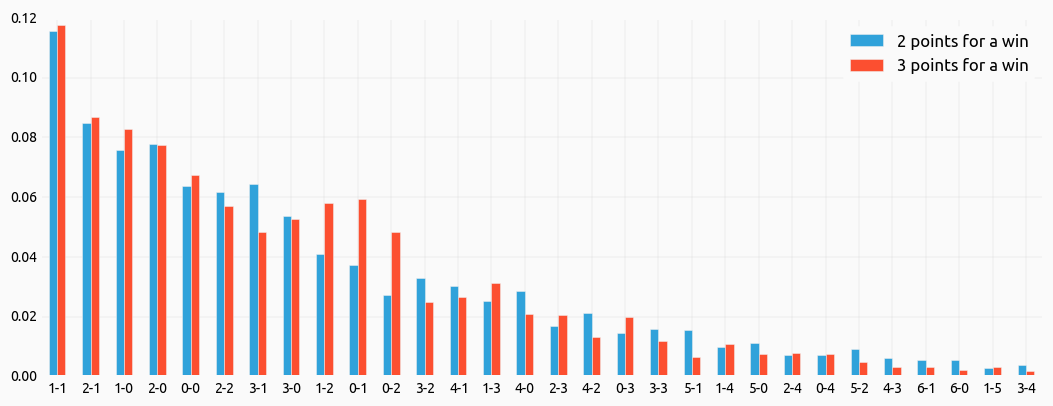

In [111]:
results_2points = df_2points.FT.value_counts()
results_3points = df_3points.FT.value_counts()

df_results = pd.concat([
    results_2points / results_2points.sum(), 
    results_3points / results_3points.sum()], axis=1).fillna(0)

cols = ['2 points for a win', '3 points for a win']
df_results.columns = cols
df_results['sum'] = df_results[cols[0]] + df_results[cols[1]]
df_results.sort('sum', inplace=True, ascending=False)

ax = df_results[cols].head(30).plot(kind='bar', figsize=(16, 6))
ax.set_xticklabels(df_results.index[:30], rotation=0)
plt.show()

In [112]:
df_results

,2 points for a win,3 points for a win,sum
1-1,0.115535,0.117647,0.233182
2-1,0.084795,0.086859,0.171654
1-0,0.075717,0.082731,0.158448
2-0,0.077677,0.077399,0.155076
0-0,0.063751,0.067251,0.131002
2-2,0.061791,0.057104,0.118894
3-1,0.064267,0.048332,0.112598
3-0,0.053848,0.052632,0.106479
1-2,0.040850,0.058136,0.098986
0-1,0.037446,0.059512,0.096957
